# Projeto 1 – Exploração e eliminação de dados espúrios
-------------------------

Este projeto faz parte de uma serie de outros projetos cuja finalidade principal é desenvolver um modelo para prever, a partir de dados demograficos e históricos, se uma conta bancária pagara a sua dívida de crédito no próximo mês. A complexidade das tarefas aumentará conforme avançamos pelo curso; este projeto inicial envolvera: 

+ Realizar operacões básicas em Python.
+ Descrever o contexto do estudo de caso.
+ Executar operações que garantam a integridade dos dados. 
+ Fornecer resumos estatísticos e visualizar os dados do estudo de caso.
+ Implementar *one-hot-enconding* em variáveis indicadoras. 

**O problema:**

Nosso cliente é uma companhia de cartão de crédito. Forneceram-nos uma base de dados que contém dados demográfico e financeiros (dos últimos seis meses) relacionados a uma amostra de 30.000 contas. Os dados estao organizados da seguinte forma: cada linha corresponde a uma linha de crédito, e as colunas guardam características relevantes a respeito dela. As linhas são rotuladas de acordo com a informação se após um período de seis meses o dono de determinada conta cumpriu com o pagamento mínimo.

**Objetivo:**

O objetivo será desenvolver um modelo preditivo capaz de inferir se uma conta pagará ou não sua dívida no próximo mês, baseando-se nos dados históricos e demográficos fornecidos pelo cliente.

**Descrição dos Dados:**

Os dados encontram-se no arquivo credito_clientes.csv, e suas colunas guardam as seguintes informações: 

+ LIMIT BAL: Limite de crédito fornecido pela empresa. 
+ EDUCATION: Nível escolar (1 = pos-graduação; 2 = curso superior; 3 = ensino médio; 4 = outros)
+ MARRIAGE: Estado civil (1 = casado; 2 = solteiro; 3 = outros)
+ AGE: Idade (anos)
+ PAY 1 - PAY 6: Historico de pagamentos anteriores, referentes aos meses de Abril a Setembro. 
    PAY 1 representa a situação do pagamento em Setembro; PAY 2 o pagamento em Agosto, e assim por diante até PAY 6, referente a Abril.
    Os valores das medidas significam: −1 = pagamento no prazo; 1 = pagamento atrasado em um mes; 2 = atrasado em dois meses, e assim por diante.
+ BILL AMT1 - BILL AMT6: Faturas do cartao de crédito.
+ PAY AMT1 - PAY AMT6: Quantia paga da fatura.
+ default payment next month: Se ele pagou ou não a fatura.

# Importando Dados e Bibliotecas

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Modelagem
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer



data = pd.read_csv(r'..\Projeto 1 - Exploração e eliminação de dados espúrios\credito_clientes.csv')


### Customização 
pd.options.display.max_columns = 24
pd.options.display.precision = 3

sns.set(style="ticks", context="notebook", palette='pastel')
plt.style.use("dark_background")

plt.rcParams['figure.figsize'] = (15,8)

In [11]:
data.head()

,ID,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Exploração dos Dados

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   EDUCATION                   30000 non-null  int64 
 3   MARRIAGE                    30000 non-null  int64 
 4   AGE                         30000 non-null  int64 
 5   PAY_1                       30000 non-null  object
 6   PAY_2                       30000 non-null  int64 
 7   PAY_3                       30000 non-null  int64 
 8   PAY_4                       30000 non-null  int64 
 9   PAY_5                       30000 non-null  int64 
 10  PAY_6                       30000 non-null  int64 
 11  BILL_AMT1                   30000 non-null  int64 
 12  BILL_AMT2                   30000 non-null  int64 
 13  BILL_AMT3                   30000 non-null  in

In [13]:
data.describe()

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,3.000e+04,30000.000,30000.000,30000.000,30000.000,3.000e+04,30000.000,30000.000,30000.000,30000.000,30000.000
mean,165760.989,1.833,1.536,35.109,-0.133,-0.164,-0.219,-0.264,-0.288,50646.744,48624.349,4.650e+04,42791.362,39884.398,38480.351,5613.322,5.855e+03,5174.388,4776.090,4754.749,5164.223,0.219
std,130158.590,0.808,0.543,9.852,1.191,1.191,1.162,1.128,1.145,73376.695,70893.963,6.910e+04,64090.316,60606.645,59406.837,16539.094,2.299e+04,17565.538,15532.893,15239.071,17712.665,0.413
min,0.000,0.000,0.000,0.000,-2.000,-2.000,-2.000,-2.000,-2.000,-165580.000,-69777.000,-1.573e+05,-170000.000,-81334.000,-339603.000,0.000,0.000e+00,0.000,0.000,0.000,0.000,0.000
25%,50000.000,1.000,1.000,28.000,-1.000,-1.000,-1.000,-1.000,-1.000,3234.000,2682.000,2.403e+03,2034.000,1534.000,1080.000,836.000,7.218e+02,371.000,223.000,170.750,9.000,0.000
50%,140000.000,2.000,2.000,34.000,0.000,0.000,0.000,0.000,0.000,21644.500,20597.000,1.975e+04,18759.500,17835.500,16643.000,2084.500,2.000e+03,1776.000,1500.000,1500.000,1500.000,0.000
75%,240000.000,2.000,2.000,41.000,0.000,0.000,0.000,0.000,0.000,66148.500,62999.750,5.953e+04,53572.250,49804.000,48863.500,5000.000,5.000e+03,4500.000,4000.000,4000.000,4000.000,0.000
max,1000000.000,6.000,3.000,79.000,8.000,8.000,8.000,8.000,8.000,964511.000,983931.000,1.664e+06,891586.000,927171.000,961664.000,873552.000,1.684e+06,896040.000,621000.000,426529.000,528666.000,1.000


Aqui já podemos ver algumas incoerências em nossos dados, como idades iguais a zero e nível de escolaridade igual a zero também, o que foge do nosso dicionário dos dados.

Outro ponto interessante é que aproximadamente 22% dos clientes não pagou a última fatura.

E de todos meses, Setembro é o que apresentou maior taxa de inadimplente chegando apenas a média em -0.018.

## Verificando se há IDs repetidos

In [14]:
data[data.duplicated('ID')]

,ID,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
241,26bde6da-f148,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
296,42009c72-651f,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
423,73ed1381-3a3f,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
440,4f95b36b-ab10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
498,8d3a2576-a958,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29570,f12b9d9e-ada0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29590,e7cd8c1a-88e9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29746,90330d02-82d9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29785,ad23fe5c-7b09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Examinando os IDs repetidos e limpando o Dataset

In [15]:
# Verificando se são só os IDs que estão repetidos ou se é a conta na totalidade

data[data.duplicated(data.columns)]

,ID,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month


In [16]:
# Precisaremos analisar qual a diferença dessas contas de mesmo ID para decidir qual manter
# Vamos pegar por exemplo as contas: 26bde6da-f148, 42009c72-651f, 97d1d2eb-c72f

display(data[data['ID'] == '26bde6da-f148'])
display(data[data['ID'] == '42009c72-651f'])
display(data[data['ID'] == '97d1d2eb-c72f'])

,ID,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
141,26bde6da-f148,180000,2,2,28,-1,-1,-1,-1,-1,-1,1832,0,832,332,416,416,0,416,332,500,3500,832,0
241,26bde6da-f148,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,ID,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
196,42009c72-651f,150000,2,1,34,-2,-2,-2,-2,-2,-2,0,0,0,116,0,1500,0,0,116,0,1500,0,0
296,42009c72-651f,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,ID,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29875,97d1d2eb-c72f,280000,1,1,31,0,0,0,0,0,0,235461,196894,168463,149816,128721,130406,8900,8100,7200,5000,5000,4700,0
29975,97d1d2eb-c72f,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Pontanto podemos concluir que sempre a segundo registro pode ser onde está ocorrendo a falha, por vir com todas as informações zeradas.

In [17]:
# Corrigindo as duplicidades

data_clean = data.drop_duplicates('ID', keep = 'first')

## Continuando a exploração dos dados, analise do tipo da variável  PAY-1

Quando usamos o função info, o python mostrou que indentificou a variável PAY-1 como object, mas sabemos que os valores que eram para serem retornardos eram inteiros, como -1, 1, 2...
Veremos se foi apenas um erro de classificação dos dados ou se apresentam valores diferentes de números

In [18]:
data_clean['PAY_1'].value_counts()

0                13089
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

In [19]:
datacc = data_clean.copy() # check-point data clean copy

In [20]:
# Encontramos valores registrados como Not available, ou seja, precisamos transformar esses valores em NaNs 
# para poder depois definir a coluna como um todo em número

datacc.loc[:,'PAY_1'] = datacc.loc[:,'PAY_1'].replace({'Not available': np.nan})
datacc.loc[:,'PAY_1'] = datacc.loc[:,'PAY_1'].apply(lambda x: pd.to_numeric(x))

C:\Users\lagee\AppData\Local\Temp\ipykernel_18444\3415051940.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  datacc.loc[:,'PAY_1'] = datacc.loc[:,'PAY_1'].apply(lambda x: pd.to_numeric(x))


In [21]:
#datacc

---------------------------
## Dando sequência a Exploração

Vamos visualizar a distribuição das Idade e dos Limite

### AGE

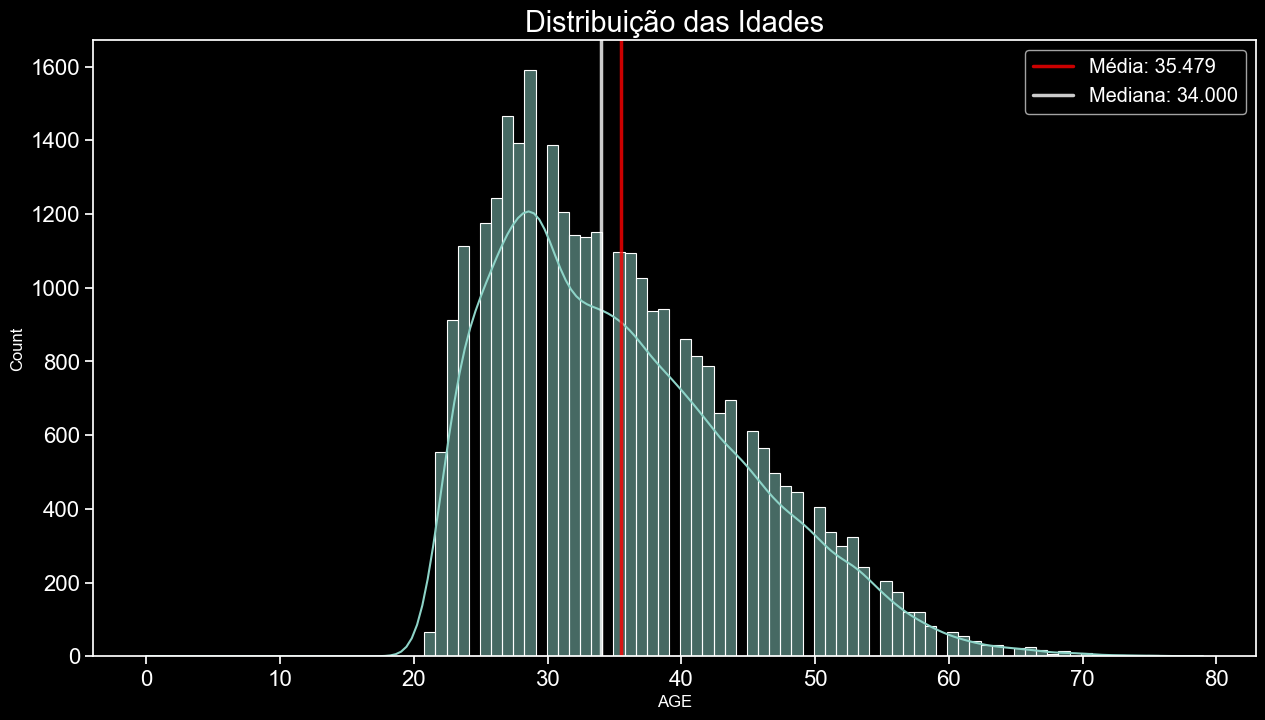

In [22]:
sns.histplot(datacc['AGE'], kde=True)
plt.axvline(datacc['AGE'].mean(), color='red', alpha = .8, lw = 2.5, label='Média: %.3f' % datacc.AGE.mean())
plt.axvline(datacc['AGE'].median(), color='white', alpha = .8, lw = 2.5, label='Mediana: %.3f' % datacc.AGE.median())
plt.title('Distribuição das Idades', fontsize = 'xx-large')
plt.legend(fontsize = 'large')
plt.tick_params(labelsize = 16)

In [23]:
print ('Média das Idades: \t %.3f' % datacc['AGE'].mean())
print ('=====================================')
print ('Mediana das Idades: \t %.3f' % datacc['AGE'].median())
print ('=====================================')
print ('Variância das Idades: \t %.3f' % datacc['AGE'].std()**2)

Média das Idades: 	 35.479
Mediana das Idades: 	 34.000
Variância das Idades: 	 84.944


Nossos clientes em geral são mais jovens e a distribuição das idades e mostrou assimétrica positiva.

### LIMIT BAL

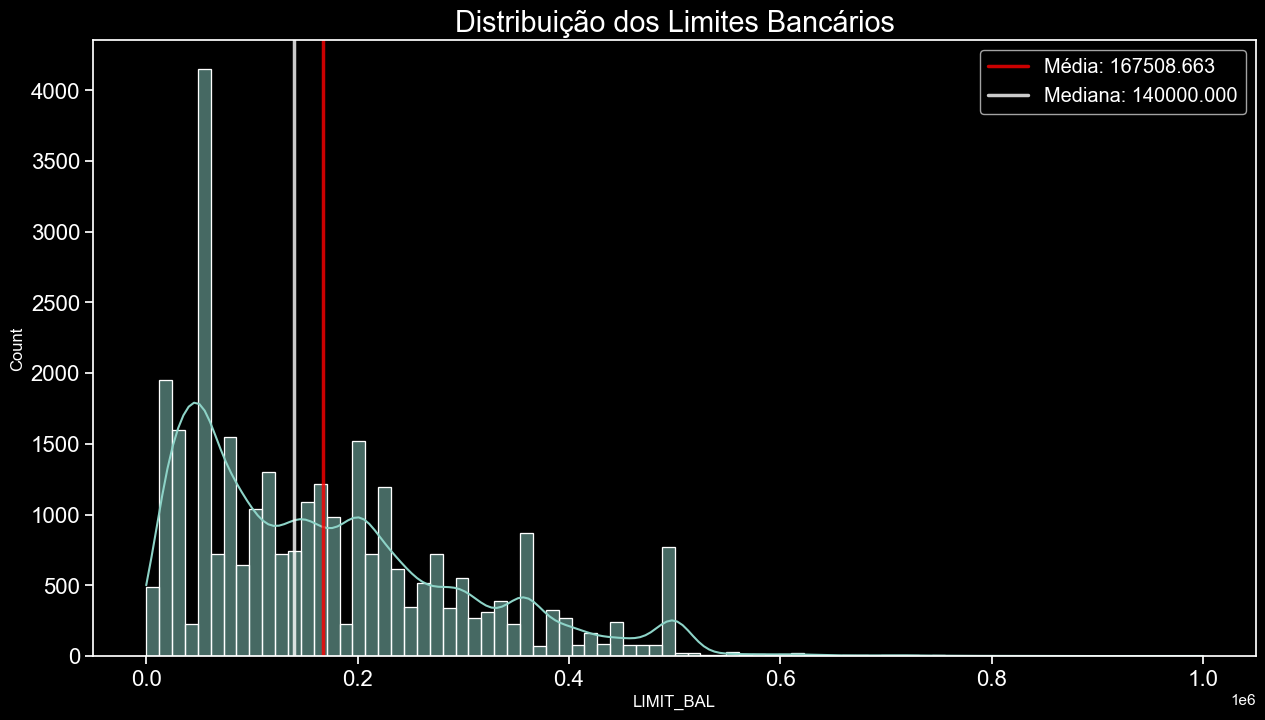

In [24]:
sns.histplot(datacc['LIMIT_BAL'], kde=True)
plt.axvline(datacc['LIMIT_BAL'].mean(), color='red', alpha = .8, lw = 2.5, label='Média: %.3f' % datacc.LIMIT_BAL.mean())
plt.axvline(datacc['LIMIT_BAL'].median(), color='white', alpha = .8, lw = 2.5, label='Mediana: %.3f' % datacc.LIMIT_BAL.median())
plt.title('Distribuição dos Limites Bancários', fontsize = 'xx-large')
plt.legend(fontsize = 'large')
plt.tick_params(labelsize = 16)

In [25]:
print ('Média dos Limites Bancários: \t %.3f' % datacc['LIMIT_BAL'].mean())
print ('=====================================')
print ('Mediana dos Limites Bancários: \t %.3f' % datacc['LIMIT_BAL'].median())
print ('=====================================')
print ('Variância dos Limites Bancários: \t %.3f' % datacc['LIMIT_BAL'].std()**2)

Média dos Limites Bancários: 	 167508.663
Mediana dos Limites Bancários: 	 140000.000
Variância dos Limites Bancários: 	 16827121703.983


O limite já apresenta uma distribuição mais complexa, parecendo ser composta por um conjunto de outras distribuições.

### EDUCATION

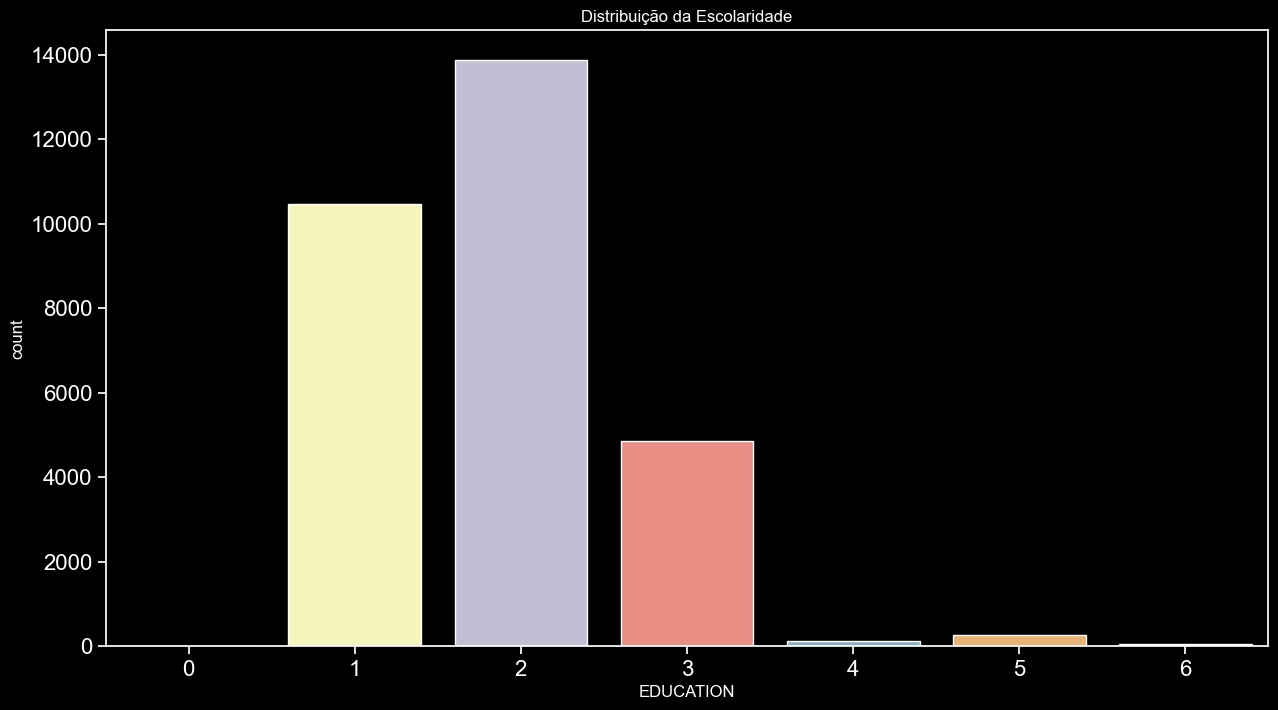

In [26]:
sns.countplot(x=datacc['EDUCATION'])
plt.title('Distribuição da Escolaridade')
plt.tick_params(labelsize = 16)

In [27]:
datacc['EDUCATION'].value_counts()

2    13884
1    10474
3     4867
5      275
4      122
6       49
0       16
Name: EDUCATION, dtype: int64

Lembrando: No dicionário dos dados temos que: **EDUCATION: Nível escolar (1 = pos-graduação; 2 = curso superior; 3 = ensino médio; 4 = outros)**

Ou seja, os dados atribuídos como 0, 5 e 6 não estão sob nosso alcançe de informação. 

### MARRIED

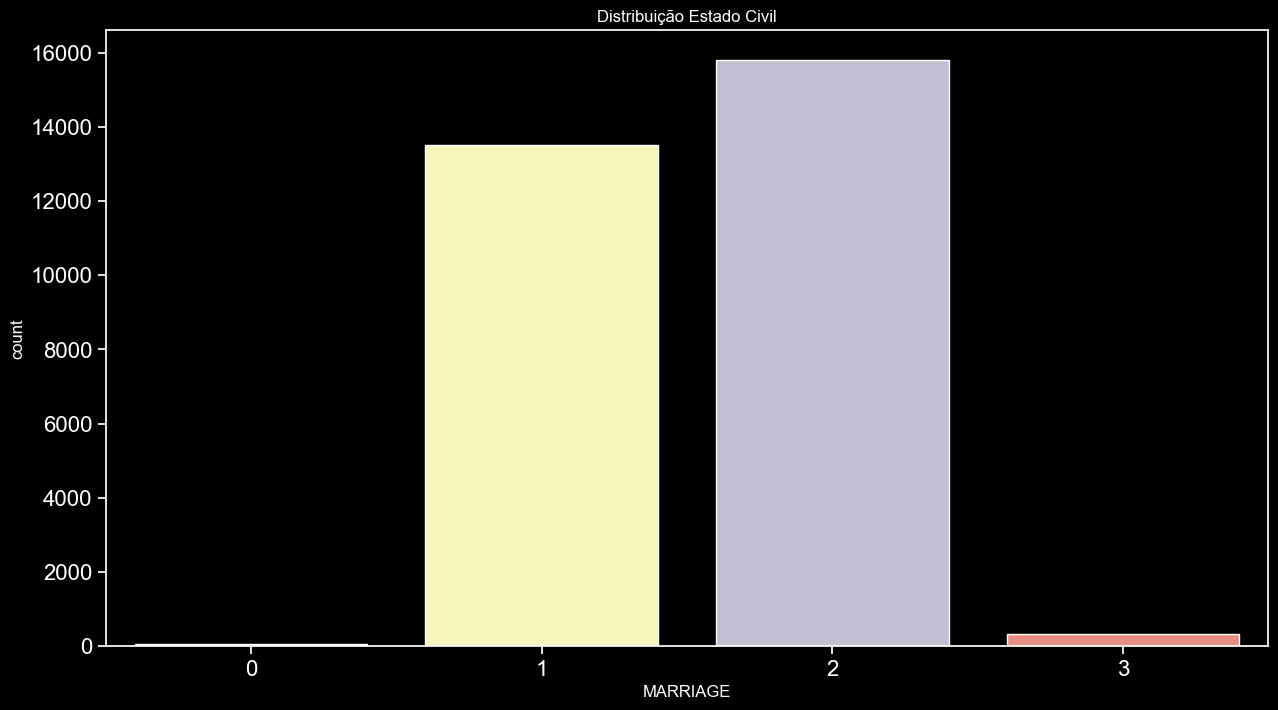

In [28]:
sns.countplot(x=datacc['MARRIAGE'])
plt.title('Distribuição Estado Civil')
plt.tick_params(labelsize = 16)

In [29]:
datacc['MARRIAGE'].value_counts()

2    15810
1    13503
3      318
0       56
Name: MARRIAGE, dtype: int64

Lembrando: No dicionário dos dados temos que: **MARRIAGE: Estado civil (1 = casado; 2 = solteiro; 3 = outros)**

Então para a variável MARRIED também temos desencontro de informação.

## One-hot encoding

In [30]:
data_dummies = pd.get_dummies(datacc, columns=['MARRIAGE'])
data_dummies.head()

,ID,LIMIT_BAL,EDUCATION,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,798fc410-45c1,20000,2,24,2.0,2,-1,-1,-2,-2,3913,3102,...,0,0,689,0,0,0,0,1,0,1,0,0
1,8a8c8f3b-8eb4,120000,2,26,-1.0,2,0,0,0,2,2682,1725,...,3261,0,1000,1000,1000,0,2000,1,0,0,1,0
2,85698822-43f5,90000,2,34,0.0,0,0,0,0,0,29239,14027,...,15549,1518,1500,1000,1000,1000,5000,0,0,0,1,0
3,0737c11b-be42,50000,2,37,0.0,0,0,0,0,0,46990,48233,...,29547,2000,2019,1200,1100,1069,1000,0,0,1,0,0
4,3b7f77cc-dbc0,50000,2,57,-1.0,0,-1,0,0,0,8617,5670,...,19131,2000,36681,10000,9000,689,679,0,0,1,0,0


In [31]:
# Vamos aplicar o one-hot encoding na variável MARRIAGE
'''
categorical_transformer = make_pipeline(OneHotEncoder(categories=['MARRIAGE']))

columns_transformer = ColumnTransformer(
    transformers=[
        ('Encoding', categorical_transformer, ['MARRIAGE']),
         ]
).fit_transform(datacc)
'''

"\ncategorical_transformer = make_pipeline(OneHotEncoder(categories=['MARRIAGE']))\n\ncolumns_transformer = ColumnTransformer(\n    transformers=[\n        ('Encoding', categorical_transformer, ['MARRIAGE']),\n         ]\n).fit_transform(datacc)\n"

## Análise da variável PAY-2 & PAY-3

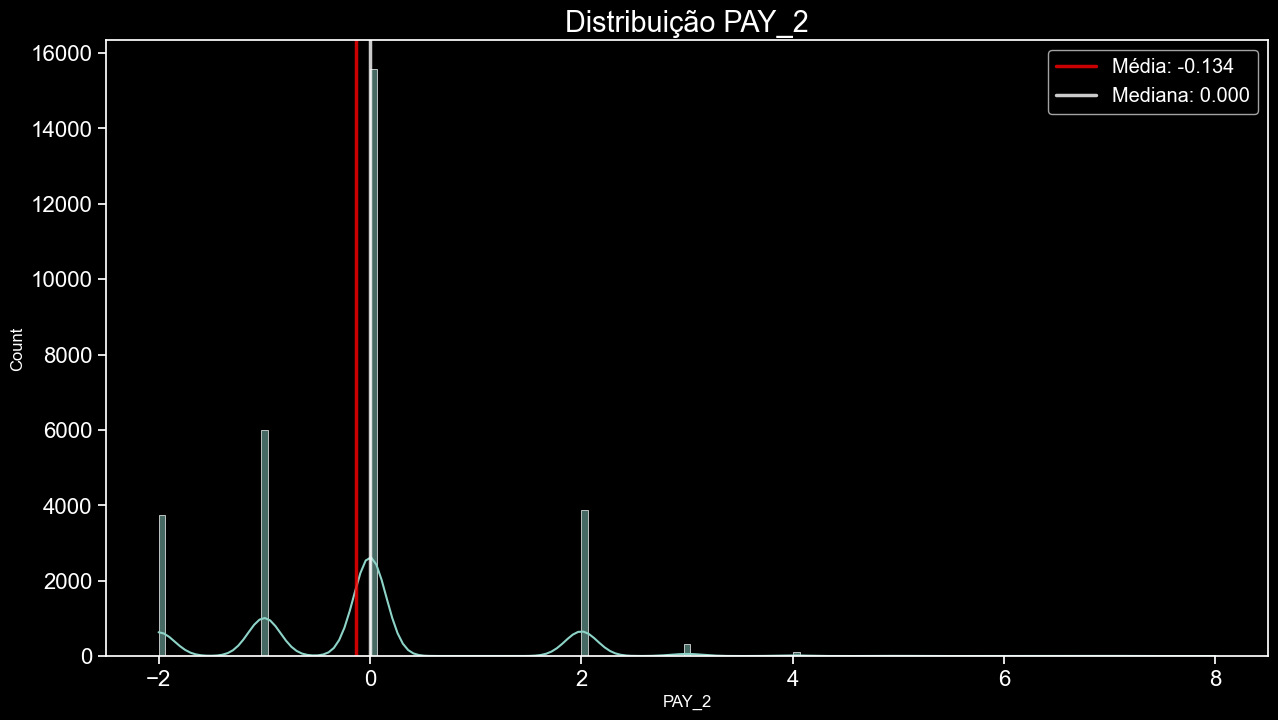

In [32]:
sns.histplot(datacc['PAY_2'], kde=True)
plt.axvline(datacc['PAY_2'].mean(), color='red', alpha = .8, lw = 2.5, label='Média: %.3f' % datacc.PAY_2.mean())
plt.axvline(datacc['PAY_2'].median(), color='white', alpha = .8, lw = 2.5, label='Mediana: %.3f' % datacc.PAY_2.median())
plt.title('Distribuição PAY_2', fontsize = 'xx-large')
plt.legend(fontsize = 'large')
plt.tick_params(labelsize = 16)

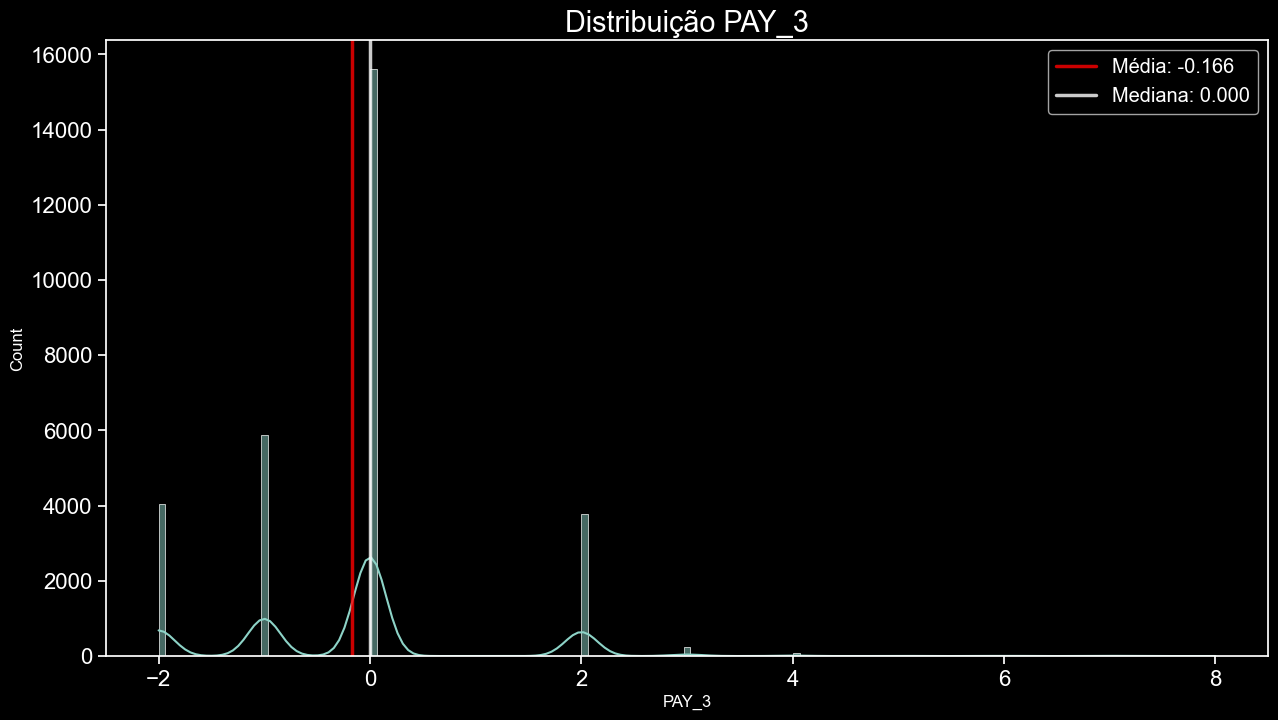

In [33]:
sns.histplot(datacc['PAY_3'], kde=True)
plt.axvline(datacc['PAY_3'].mean(), color='red', alpha = .8, lw = 2.5, label='Média: %.3f' % datacc.PAY_3.mean())
plt.axvline(datacc['PAY_3'].median(), color='white', alpha = .8, lw = 2.5, label='Mediana: %.3f' % datacc.PAY_3.median())
plt.title('Distribuição PAY_3', fontsize = 'xx-large')
plt.legend(fontsize = 'large')
plt.tick_params(labelsize = 16)

Text(0.5, 1.0, 'Box Plots Pagamentos')

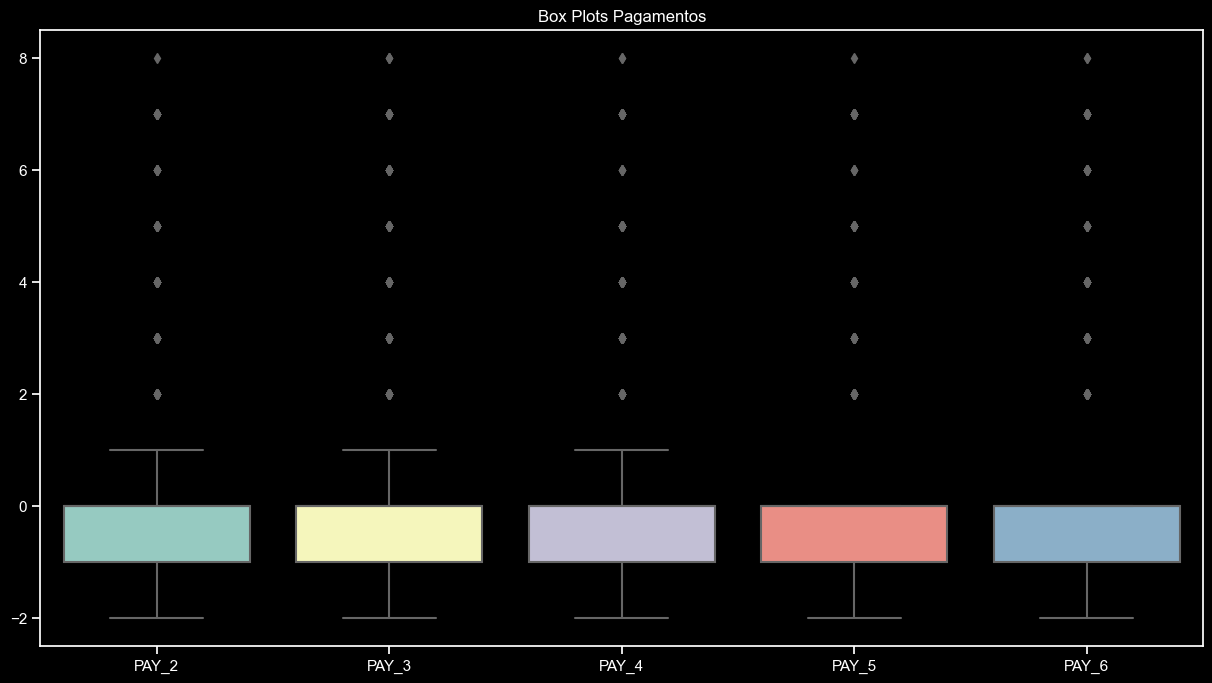

In [34]:
sns.boxplot(data=datacc[['PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']])
plt.title('Box Plots Pagamentos')

Todas as variáveis históricas de pagamentos das faturas apresentaram valores -2, o que não condiz com as as informações passadas. 

## Mais histogramas e distribuições...

In [35]:
def plot_hist(coluna, log=False):
    if log == True:
        sns.histplot(np.log10(datacc[datacc[coluna] != 0][coluna]), kde=True)
        plt.axvline(np.log10(datacc[datacc[coluna] != 0][coluna]).mean(), color='red', alpha = .8, lw = 2.5, label='Média: %.3f' % np.log10(datacc[datacc[coluna] != 0][coluna]).mean())
        plt.axvline(np.log10(datacc[datacc[coluna] != 0][coluna]).median(), color='white', alpha = .8, lw = 2.5, label='Mediana: %.3f' % np.log10(datacc[datacc[coluna] != 0][coluna]).median())
       #plt.title(f'Distribuição log10 {coluna}', fontsize = 'xx-large')
        plt.legend(fontsize = 'large')
        #plt.tick_params(labelsize = 16)
        print(datacc[coluna].describe(), '\n================================')        
        
    else:
        sns.histplot(datacc[coluna], kde=True)
        plt.axvline(datacc[coluna].mean(), color='red', alpha = .8, lw = 2.5, label='Média: %.3f' % datacc[coluna].mean())
        plt.axvline(datacc[coluna].median(), color='white', alpha = .8, lw = 2.5, label='Mediana: %.3f' % datacc[coluna].median())
        #plt.title(f'Distribuição {coluna}', fontsize = 'xx-large')
        plt.legend(fontsize = 'large')
        #plt.tick_params(labelsize = 16)
        print(datacc[coluna].describe(), '\n================================')

In [36]:
#plot_hist('BILL_AMT1', log=False)

In [37]:
#np.log10(abs(datacc[datacc['BILL_AMT1'] != 0]['BILL_AMT1']))

In [38]:
# Função para plotar todas os meses de cada variáveil

def plot_geral(var, log):
    plt.figure(figsize = (18,20))
    for i in range(1,7):
        var_i = var + str(i)
        plt.subplot(3,2,i); plot_hist(var_i, log)

### PAY

count    26666.000
mean        -0.018
std          1.127
min         -2.000
25%         -1.000
50%          0.000
75%          0.000
max          8.000
Name: PAY_1, dtype: float64 
count    29687.000
mean        -0.134
std          1.197
min         -2.000
25%         -1.000
50%          0.000
75%          0.000
max          8.000
Name: PAY_2, dtype: float64 
count    29687.000
mean        -0.166
std          1.197
min         -2.000
25%         -1.000
50%          0.000
75%          0.000
max          8.000
Name: PAY_3, dtype: float64 
count    29687.000
mean        -0.222
std          1.168
min         -2.000
25%         -1.000
50%          0.000
75%          0.000
max          8.000
Name: PAY_4, dtype: float64 
count    29687.000
mean        -0.267
std          1.133
min         -2.000
25%         -1.000
50%          0.000
75%          0.000
max          8.000
Name: PAY_5, dtype: float64 
count    29687.000
mean        -0.291
std          1.151
min         -2.000
25%         -1.000


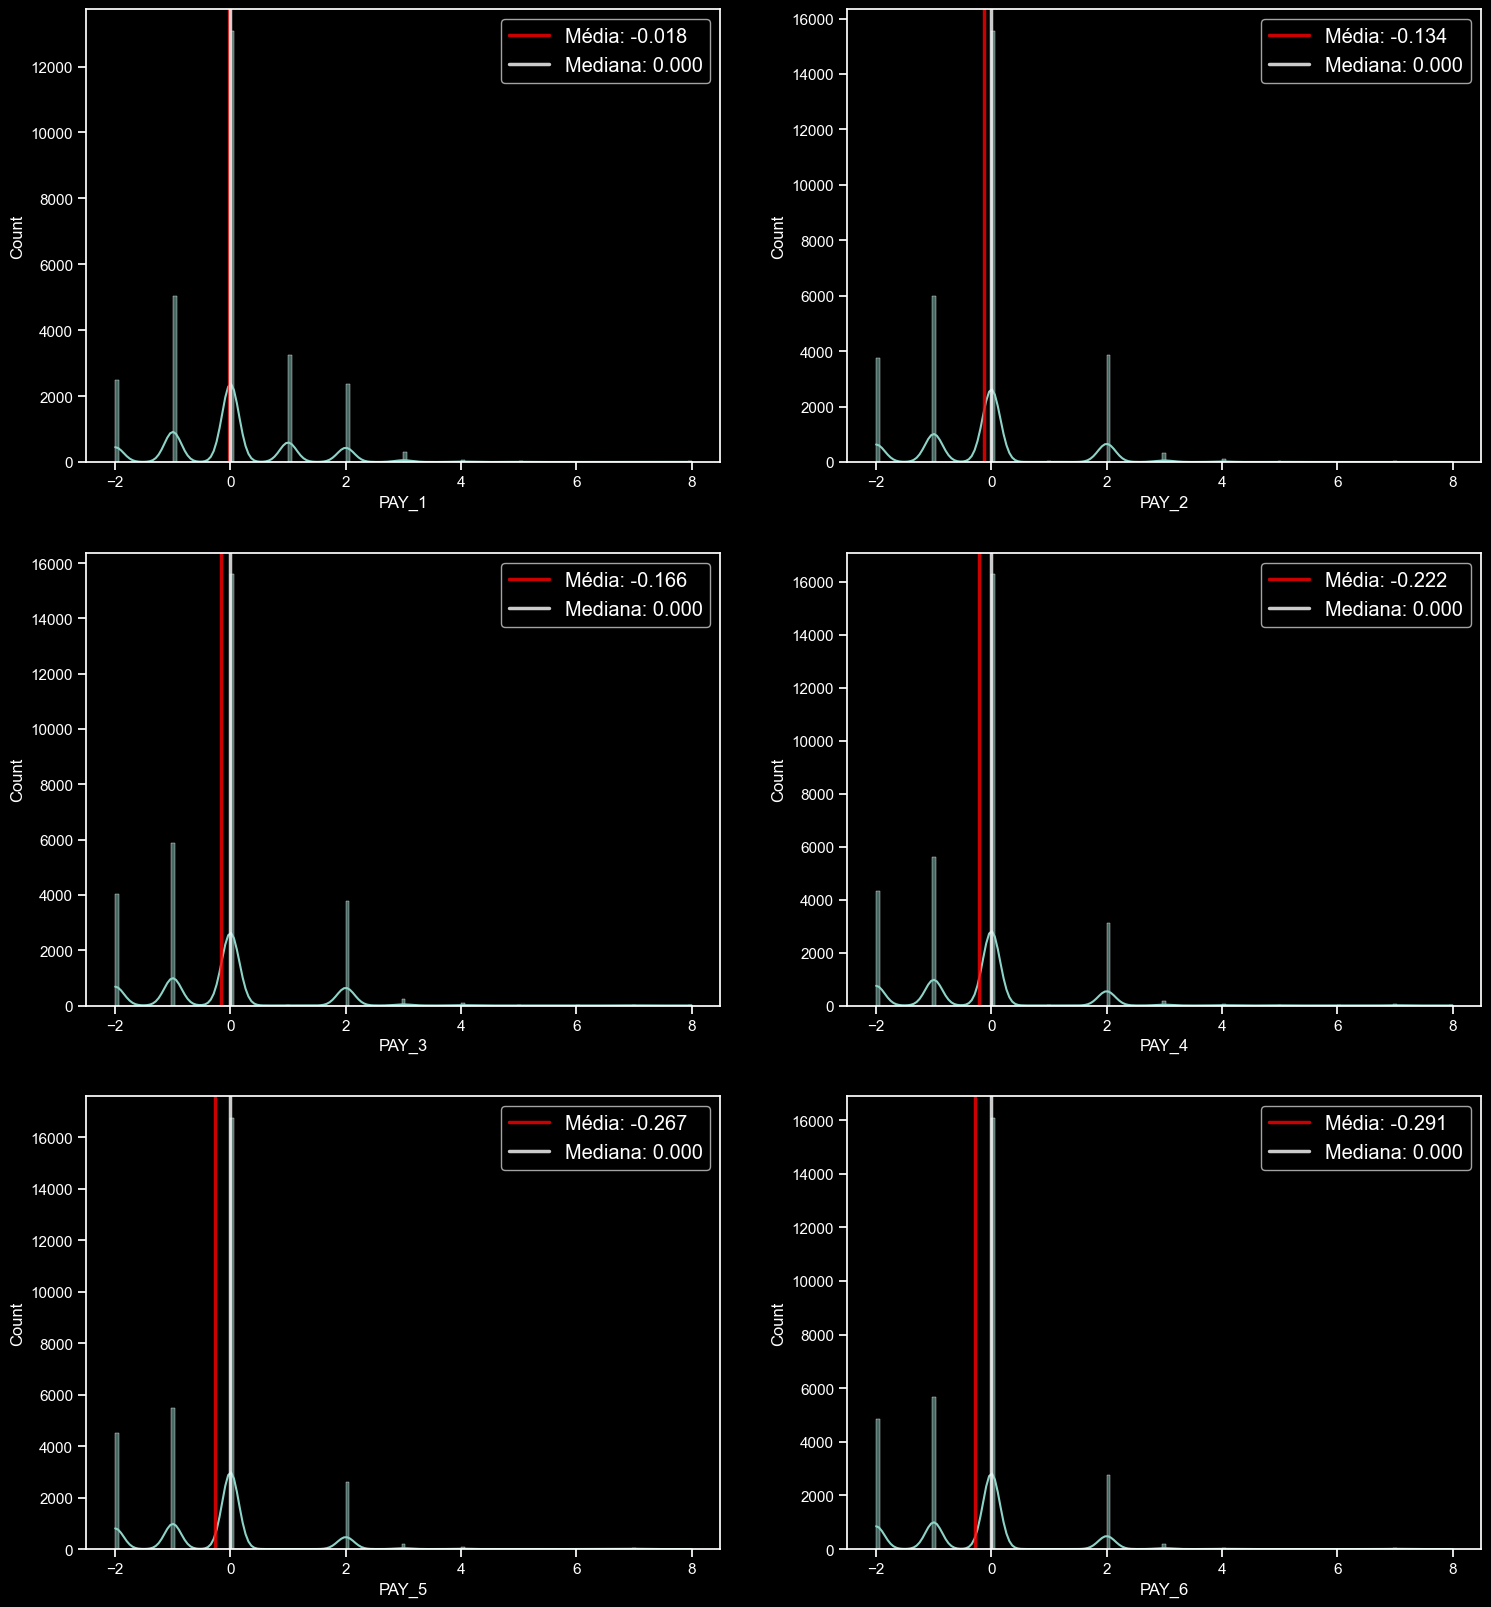

In [39]:
plot_geral('PAY_', log=False)

Aqui o que mais me chamou a atenção é o fato de nos últimos 6 meses sempre ter relativamente um alto número de valores dispostos como -2, pode ser qeu seja pelo fato de alguns clientes adiantarem suas faturas (apenas uma suposição).
Vale a pena realizar uma imersão e olhar de fato o que está acontecendo.
Como os dados são descritos apenas como -1 pagamento no prazo, é valido perguntar a quem disponibilizou os dados se há falta de informação ou se estamos com dados divergentes.
O mês em que houve a menor taxa de pagamento foi em Setembro.

### BILL AMT

count     29687.000
mean      51180.730
std       73577.017
min     -165580.000
25%        3558.500
50%       22377.000
75%       67023.000
max      964511.000
Name: BILL_AMT1, dtype: float64 
count     29687.000
mean      49137.012
std       71089.764
min      -69777.000
25%        2982.500
50%       21192.000
75%       63970.000
max      983931.000
Name: BILL_AMT2, dtype: float64 
count    2.969e+04
mean     4.699e+04
std      6.930e+04
min     -1.573e+05
25%      2.661e+03
50%      2.010e+04
75%      6.017e+04
max      1.664e+06
Name: BILL_AMT3, dtype: float64 
count     29687.000
mean      43242.526
std       64275.714
min     -170000.000
25%        2326.500
50%       19038.000
75%       54509.000
max      891586.000
Name: BILL_AMT4, dtype: float64 
count     29687.000
mean      40304.913
std       60786.057
min      -81334.000
25%        1759.500
50%       18105.000
75%       50239.500
max      927171.000
Name: BILL_AMT5, dtype: float64 
count     29687.000
mean      38886.062
std

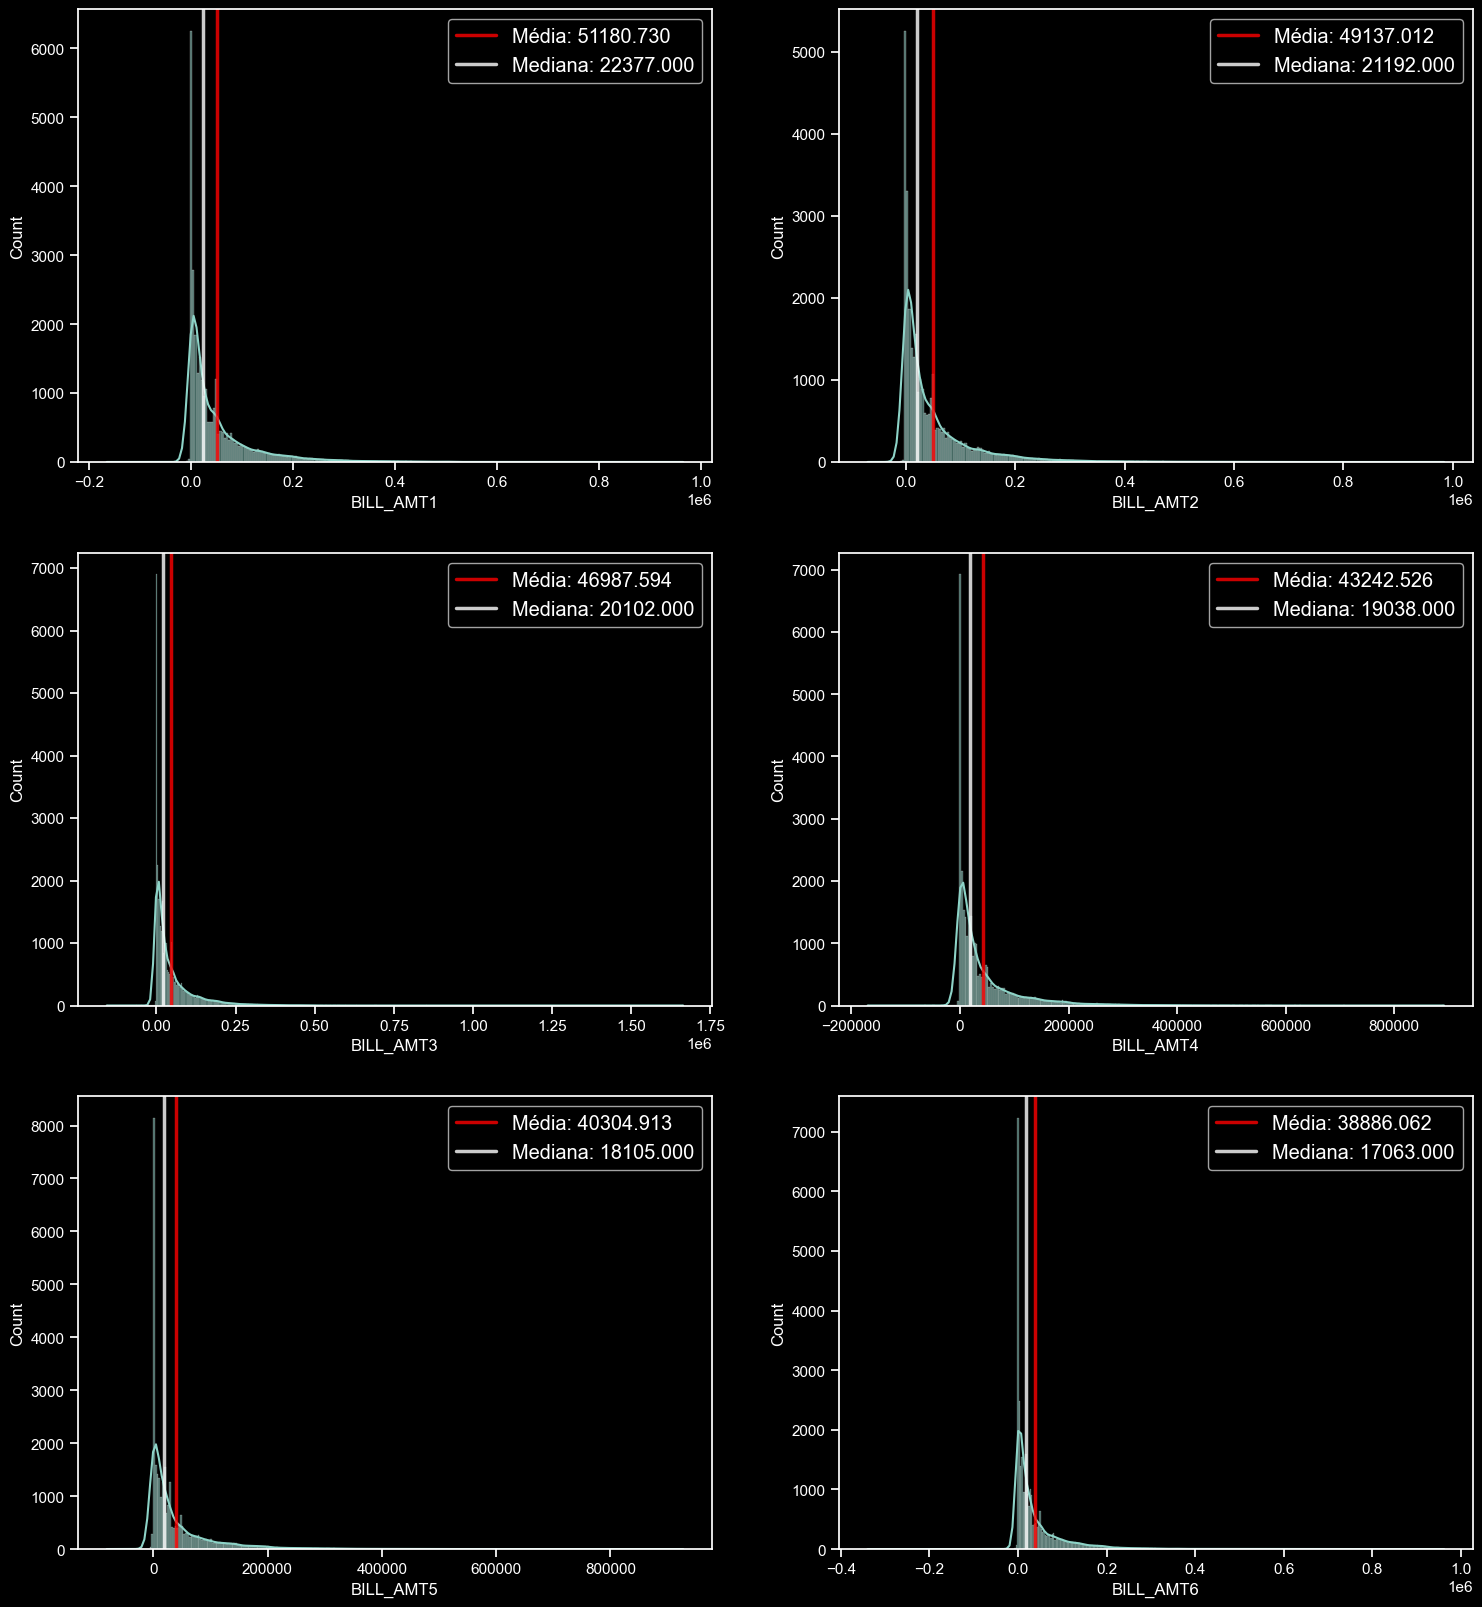

In [40]:
plot_geral('BILL_AMT', log=False)

Aqui provavelmente está a relação do porque Setembro foi o mês com menor taxa de pagamentos, esse também foi o mês com maior média de valores nas faturas.
Podemos observar que as faturas com maior valor num geral ficou próximo dos $900 mil e em Julho há um valor que se destaca chegando na casa dos 1.6 mi.

### PAY AMT

count     29687.000
mean       5672.505
std       16615.958
min           0.000
25%        1000.000
50%        2100.000
75%        5007.000
max      873552.000
Name: PAY_AMT1, dtype: float64 
count    2.969e+04
mean     5.917e+03
std      2.311e+04
min      0.000e+00
25%      8.320e+02
50%      2.008e+03
75%      5.000e+03
max      1.684e+06
Name: PAY_AMT2, dtype: float64 
count     29687.000
mean       5228.943
std       17649.819
min           0.000
25%         390.000
50%        1800.000
75%        4507.500
max      896040.000
Name: PAY_AMT3, dtype: float64 
count     29687.000
mean       4826.446
std       15606.781
min           0.000
25%         296.000
50%        1500.000
75%        4015.000
max      621000.000
Name: PAY_AMT4, dtype: float64 
count     29687.000
mean       4804.880
std       15311.334
min           0.000
25%         249.000
50%        1500.000
75%        4040.500
max      426529.000
Name: PAY_AMT5, dtype: float64 
count     29687.000
mean       5218.671
std     

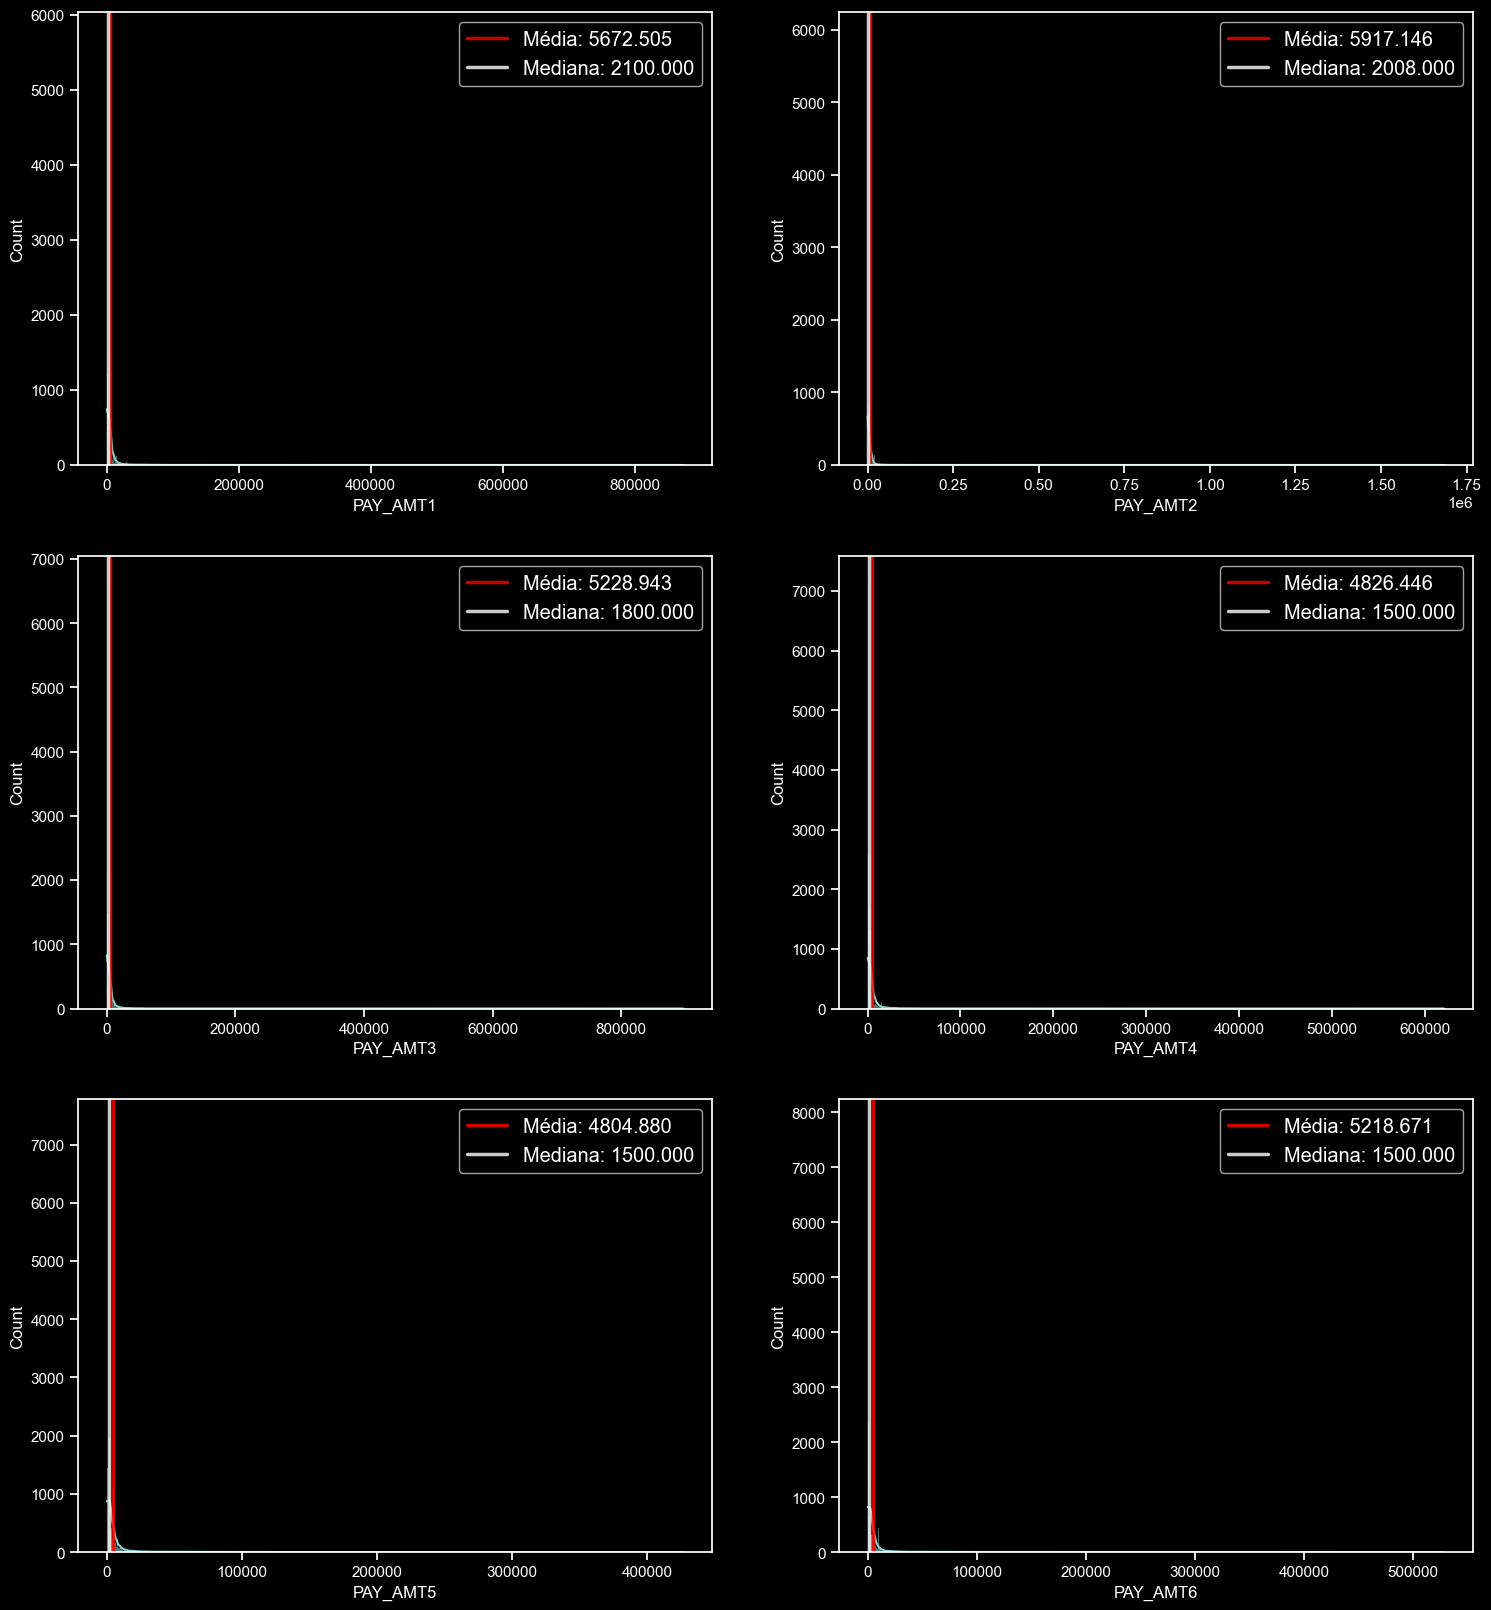

In [41]:
plot_geral('PAY_AMT', log=False)

Para o valor das quantias pagas nas faturas temos os valores com médias de 5000 sendo que o quantil 75 ficou próximo desse valor também, e isso leva a uma incongruência, porque se temos mais gente pagando faturas do que atrasando (vide aos gráficos $PAY_i$) e as faturas com valores de $10^4$ (vide a variável **BILL_AMT**) e agora vemos que as faturas pagas ficam na casa de $10^3$.

Se realmente os valores forem esses, a taxa de pagamento das faturas ia ser positiva, ou seja, a grande parte das pessoas atrsadno pagamentos e mais, essa taxa crescendo no decorrer dos meses.

### Aplicando log

In [42]:
import warnings
warnings.filterwarnings("ignore")

count    26666.000
mean        -0.018
std          1.127
min         -2.000
25%         -1.000
50%          0.000
75%          0.000
max          8.000
Name: PAY_1, dtype: float64 
count    29687.000
mean        -0.134
std          1.197
min         -2.000
25%         -1.000
50%          0.000
75%          0.000
max          8.000
Name: PAY_2, dtype: float64 
count    29687.000
mean        -0.166
std          1.197
min         -2.000
25%         -1.000
50%          0.000
75%          0.000
max          8.000
Name: PAY_3, dtype: float64 
count    29687.000
mean        -0.222
std          1.168
min         -2.000
25%         -1.000
50%          0.000
75%          0.000
max          8.000
Name: PAY_4, dtype: float64 
count    29687.000
mean        -0.267
std          1.133
min         -2.000
25%         -1.000
50%          0.000
75%          0.000
max          8.000
Name: PAY_5, dtype: float64 
count    29687.000
mean        -0.291
std          1.151
min         -2.000
25%         -1.000


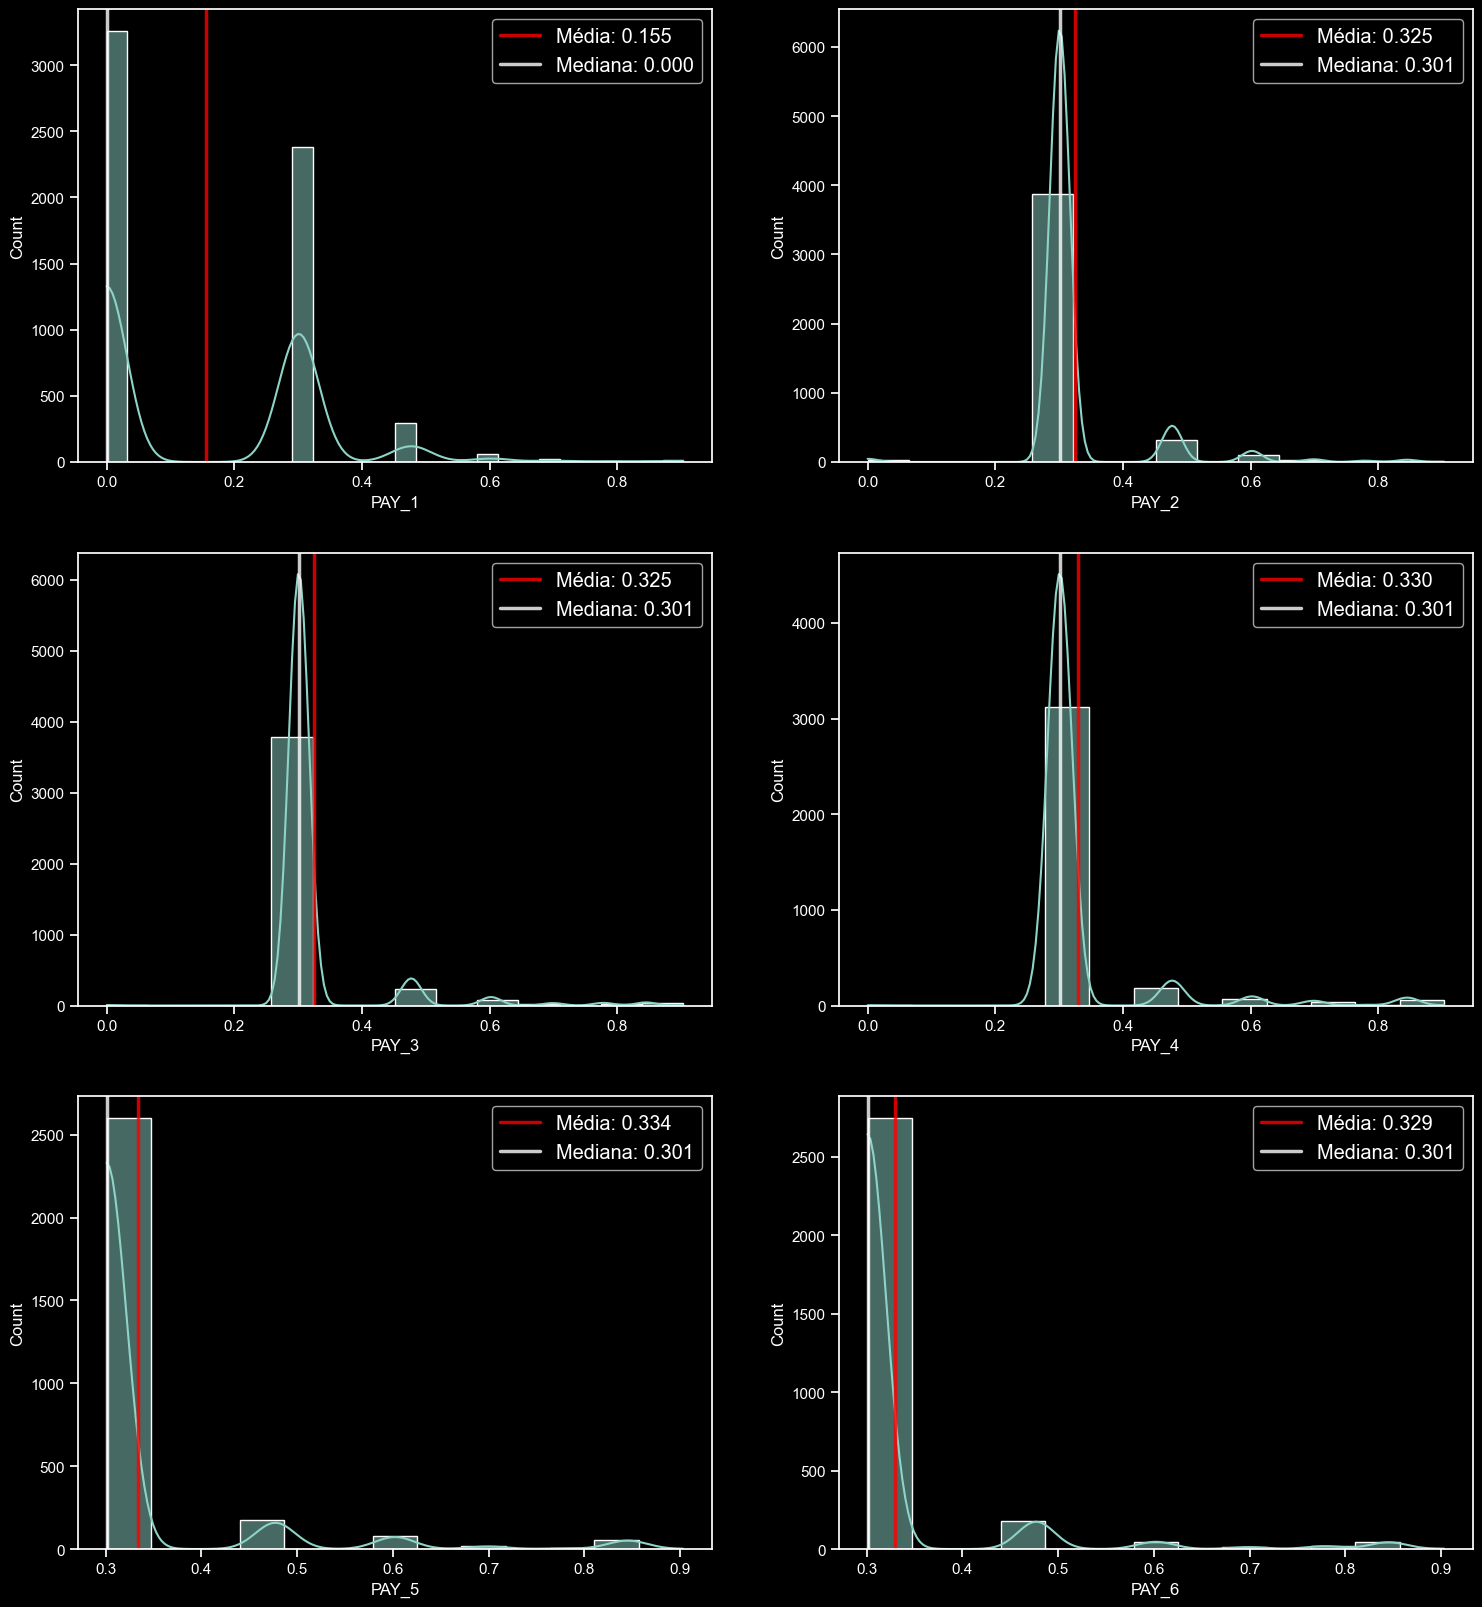

In [43]:
plot_geral('PAY_', log=True)

count     29687.000
mean      51180.730
std       73577.017
min     -165580.000
25%        3558.500
50%       22377.000
75%       67023.000
max      964511.000
Name: BILL_AMT1, dtype: float64 
count     29687.000
mean      49137.012
std       71089.764
min      -69777.000
25%        2982.500
50%       21192.000
75%       63970.000
max      983931.000
Name: BILL_AMT2, dtype: float64 
count    2.969e+04
mean     4.699e+04
std      6.930e+04
min     -1.573e+05
25%      2.661e+03
50%      2.010e+04
75%      6.017e+04
max      1.664e+06
Name: BILL_AMT3, dtype: float64 
count     29687.000
mean      43242.526
std       64275.714
min     -170000.000
25%        2326.500
50%       19038.000
75%       54509.000
max      891586.000
Name: BILL_AMT4, dtype: float64 
count     29687.000
mean      40304.913
std       60786.057
min      -81334.000
25%        1759.500
50%       18105.000
75%       50239.500
max      927171.000
Name: BILL_AMT5, dtype: float64 
count     29687.000
mean      38886.062
std

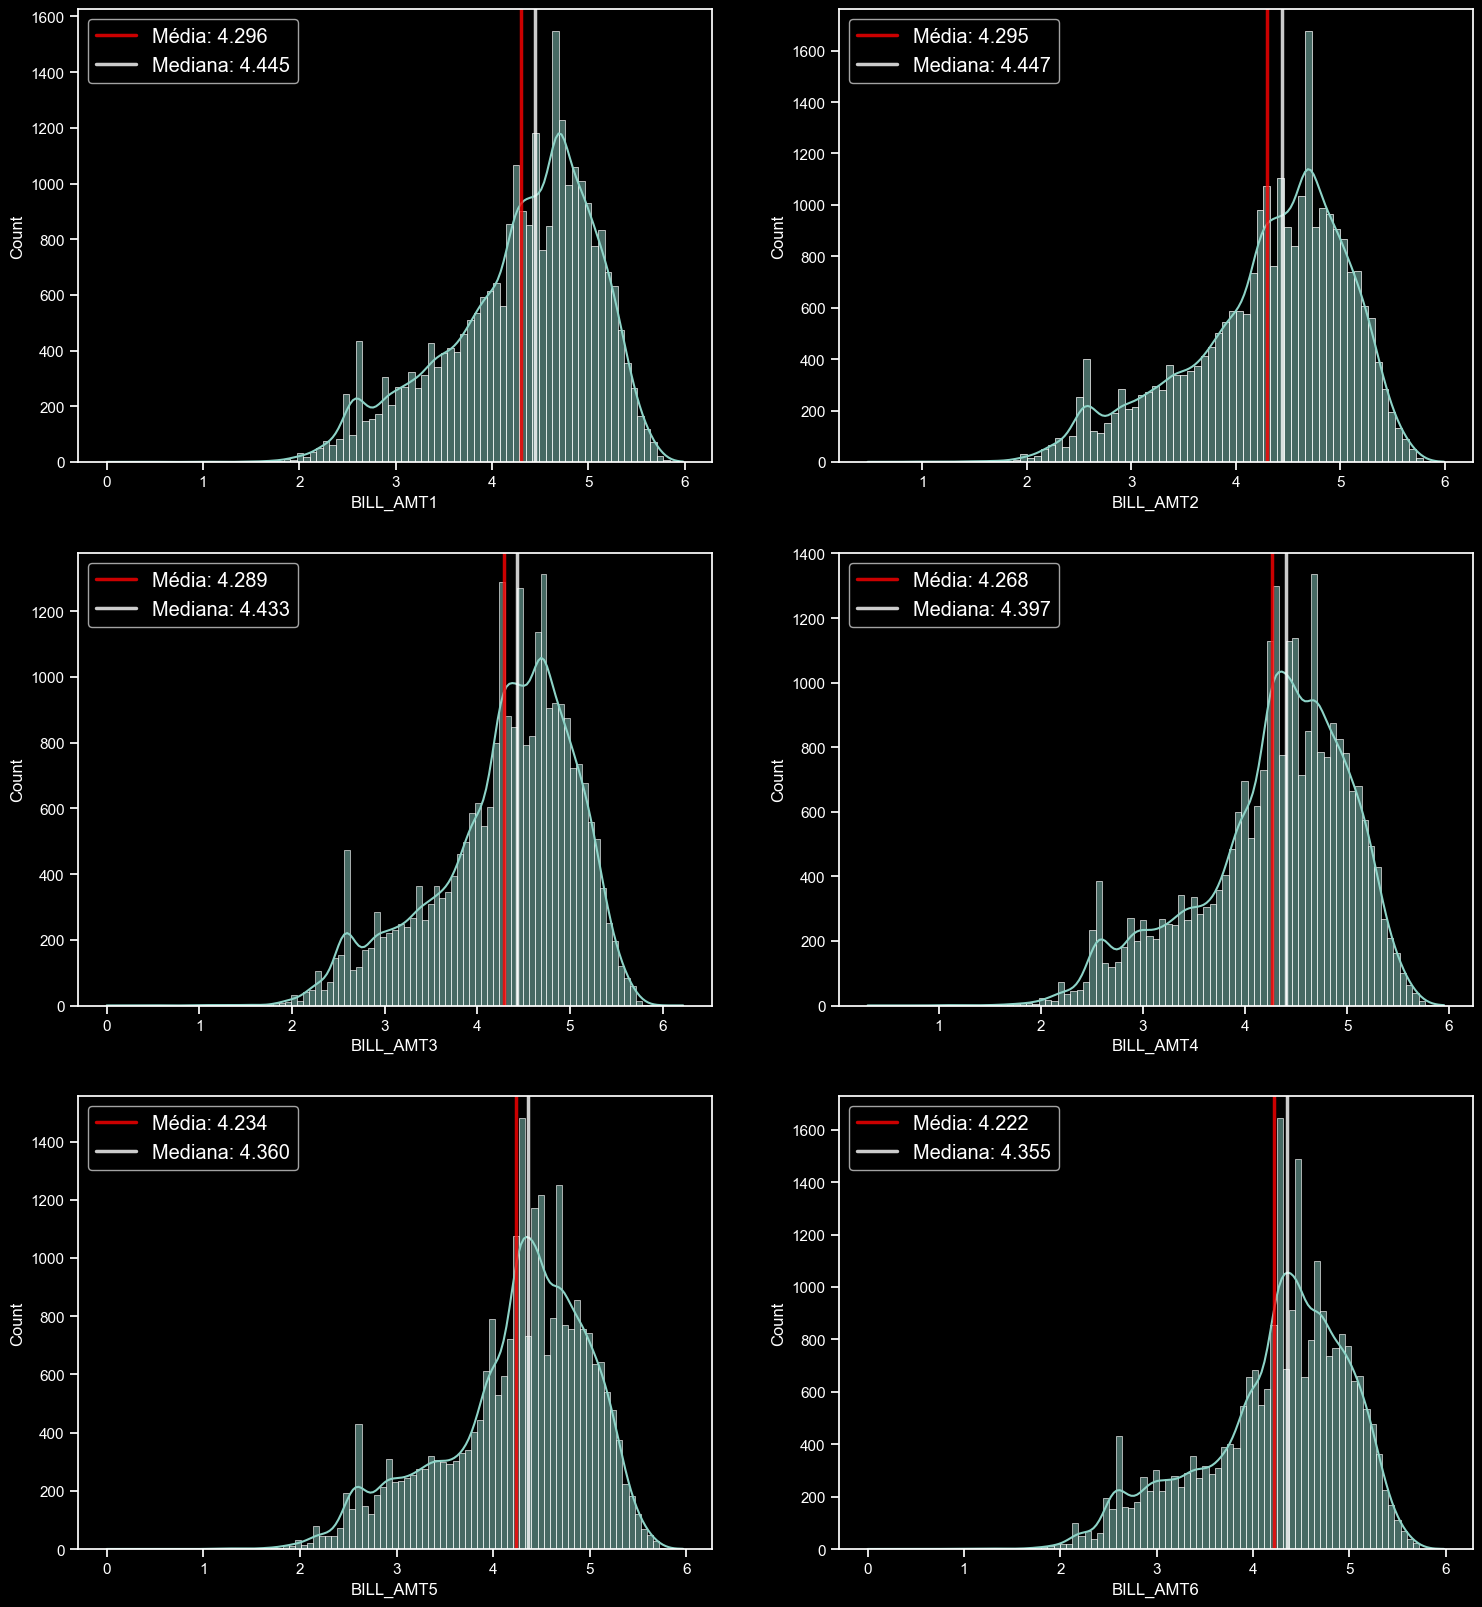

In [44]:
plot_geral('BILL_AMT', log=True)

count     29687.000
mean       5672.505
std       16615.958
min           0.000
25%        1000.000
50%        2100.000
75%        5007.000
max      873552.000
Name: PAY_AMT1, dtype: float64 
count    2.969e+04
mean     5.917e+03
std      2.311e+04
min      0.000e+00
25%      8.320e+02
50%      2.008e+03
75%      5.000e+03
max      1.684e+06
Name: PAY_AMT2, dtype: float64 
count     29687.000
mean       5228.943
std       17649.819
min           0.000
25%         390.000
50%        1800.000
75%        4507.500
max      896040.000
Name: PAY_AMT3, dtype: float64 
count     29687.000
mean       4826.446
std       15606.781
min           0.000
25%         296.000
50%        1500.000
75%        4015.000
max      621000.000
Name: PAY_AMT4, dtype: float64 
count     29687.000
mean       4804.880
std       15311.334
min           0.000
25%         249.000
50%        1500.000
75%        4040.500
max      426529.000
Name: PAY_AMT5, dtype: float64 
count     29687.000
mean       5218.671
std     

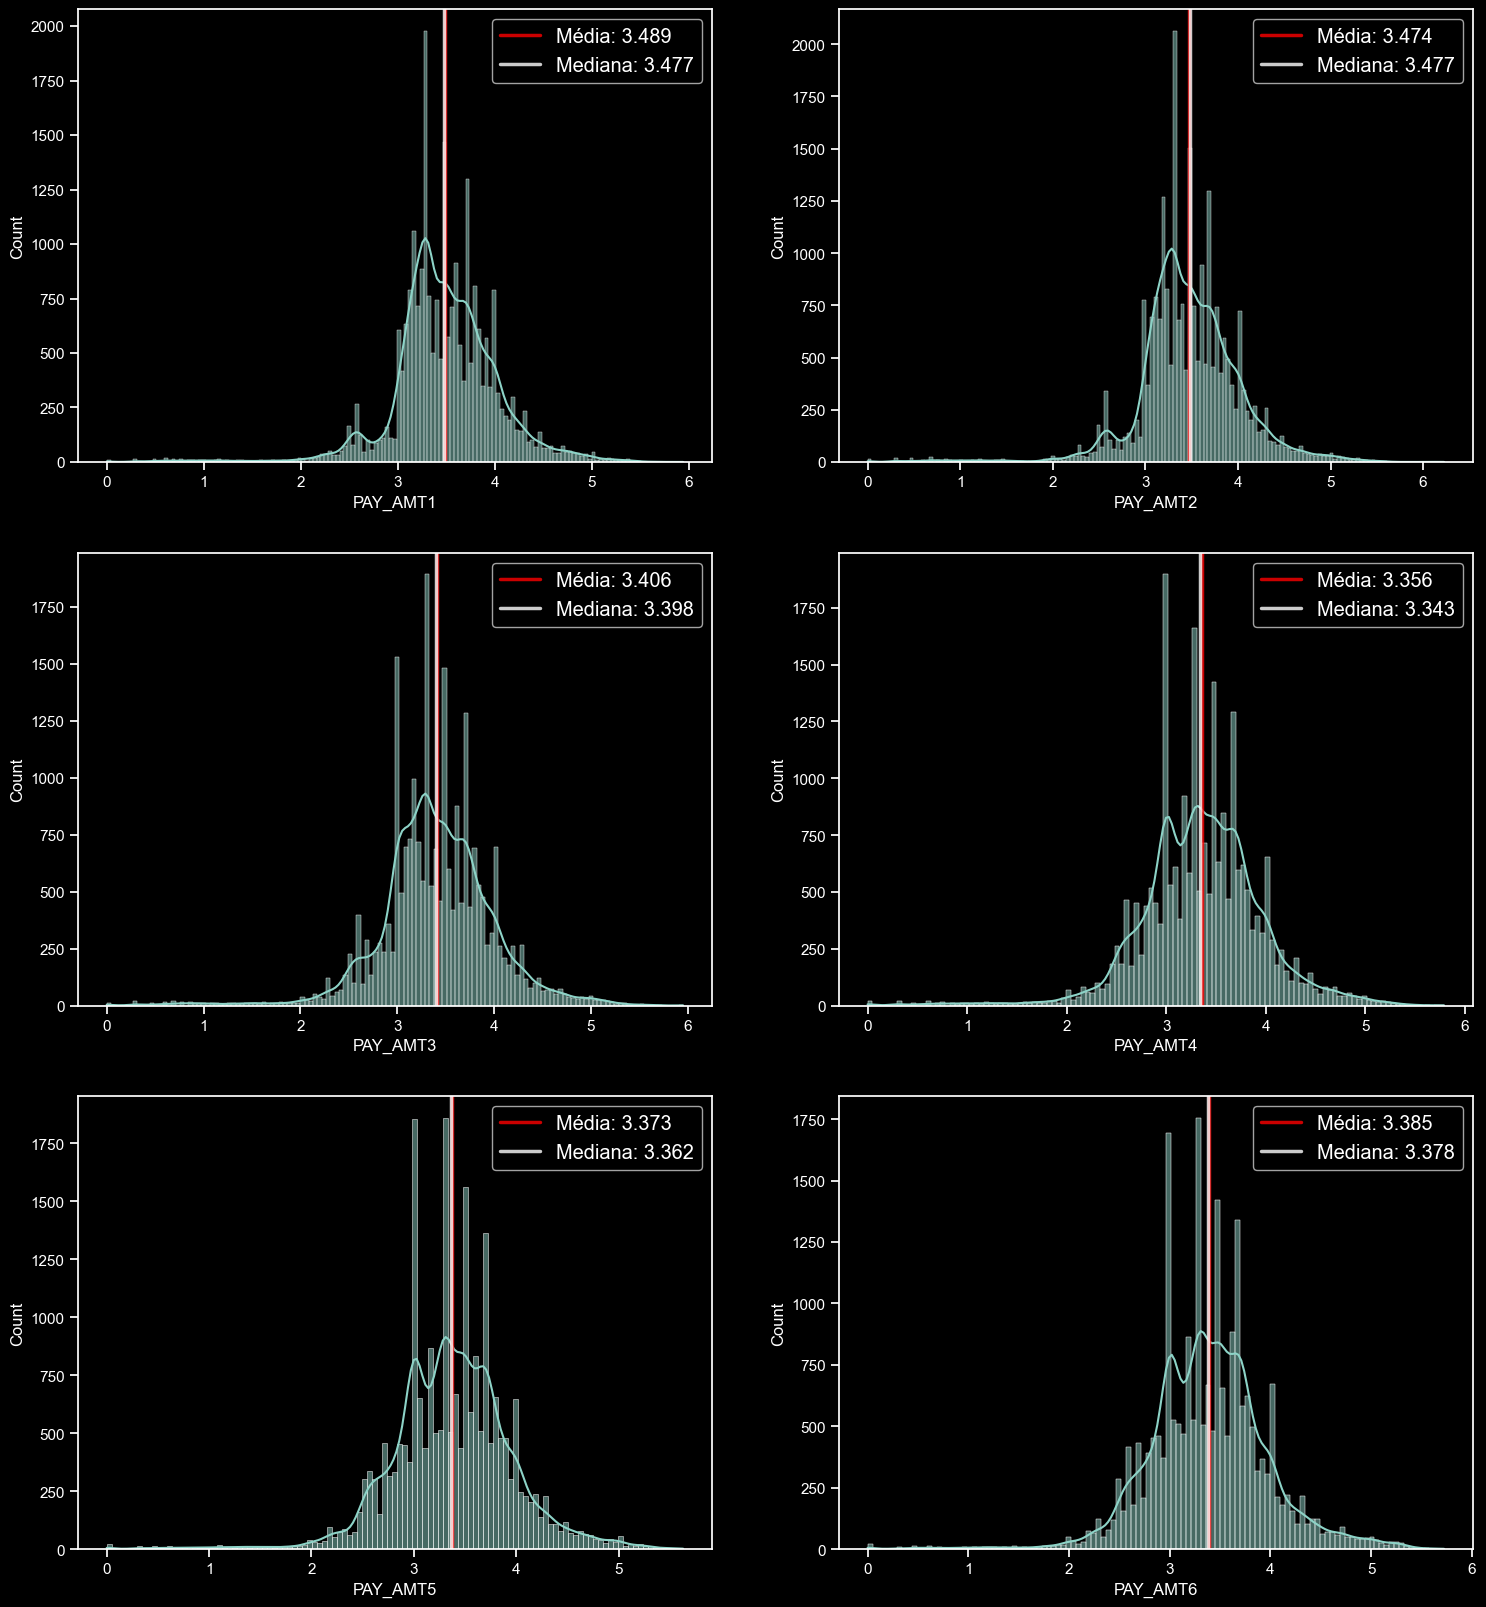

In [45]:
plot_geral('PAY_AMT', log=True)

Ao aplicar os logs a escala dos dados se aproxima, a taxa de pagamento das faturas aumenta, mas mesmo assim o valor visto num geral das faturas se sobressai aos valores pagos nas faturas.

**EXPORTANDO BASE PARA PRÓXIMOS PASSOS**

In [46]:
datacc.to_csv('base_limpa.csv', index=False)